# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | wijhe
Processing Record 13 of Set 1 | northam
Processing Record 14 of Set 1 | micoud
Processing Record 15 of Set 1 | presidencia de la plaza
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | edinb

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.86,70,78,32.77,TF,1706635768
1,vorgashor,67.5833,63.9500,7.41,95,100,12.24,RU,1706635769
2,jamestown,42.0970,-79.2353,36.99,90,100,11.50,US,1706635557
3,constantia,44.1833,28.6500,29.08,71,83,13.35,RO,1706635513
4,yellowknife,62.4560,-114.3525,19.92,100,100,15.01,CA,1706635770


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.86,70,78,32.77,TF,1706635768
1,vorgashor,67.5833,63.9500,7.41,95,100,12.24,RU,1706635769
2,jamestown,42.0970,-79.2353,36.99,90,100,11.50,US,1706635557
3,constantia,44.1833,28.6500,29.08,71,83,13.35,RO,1706635513
4,yellowknife,62.4560,-114.3525,19.92,100,100,15.01,CA,1706635770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

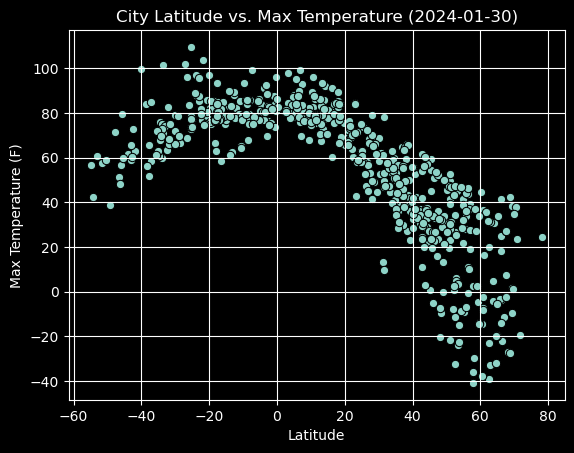

In [10]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude, temperature, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Max Temperature (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

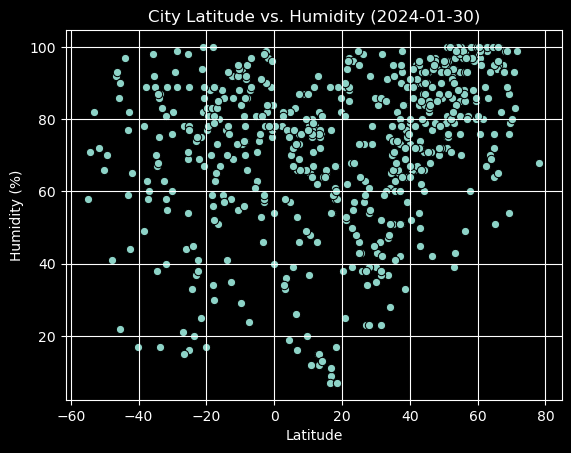

In [11]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(latitude, humidity, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Humidity (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

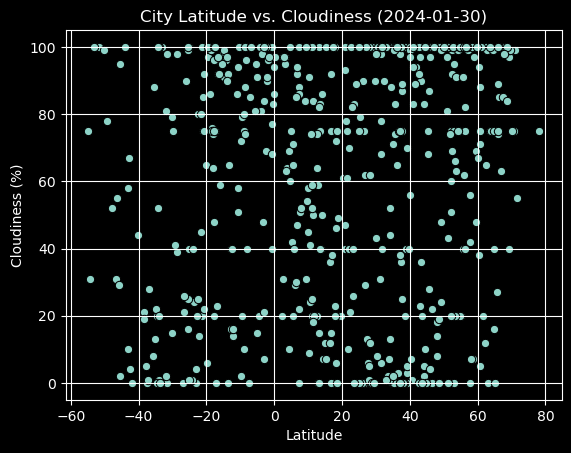

In [12]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Cloudiness (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

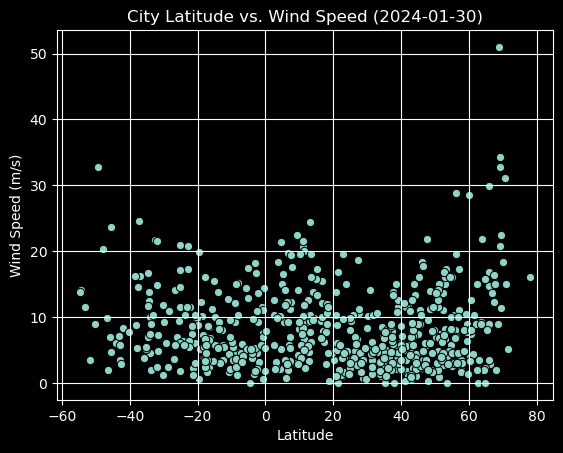

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Wind Speed (2024-01-30)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linregress_plot(x, y, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {abs(rvalue)}')
    plt.scatter(x,y)
    plt.xlabel('Latitude')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, coord, fontsize=15, color='red')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,7.41,95,100,12.24,RU,1706635769
2,jamestown,42.0970,-79.2353,36.99,90,100,11.50,US,1706635557
3,constantia,44.1833,28.6500,29.08,71,83,13.35,RO,1706635513
4,yellowknife,62.4560,-114.3525,19.92,100,100,15.01,CA,1706635770
5,wailua homesteads,22.0669,-159.3780,69.75,88,40,5.75,US,1706635771


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.86,70,78,32.77,TF,1706635768
6,bredasdorp,-34.5322,20.0403,72.19,67,20,16.69,ZA,1706635772
7,puerto natales,-51.7236,-72.4875,57.65,72,100,3.44,CL,1706635773
8,alice springs,-23.7000,133.8833,87.35,20,24,10.36,AU,1706635773
13,presidencia de la plaza,-27.0015,-59.8424,102.06,21,0,3.58,AR,1706635776


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.837888148192597


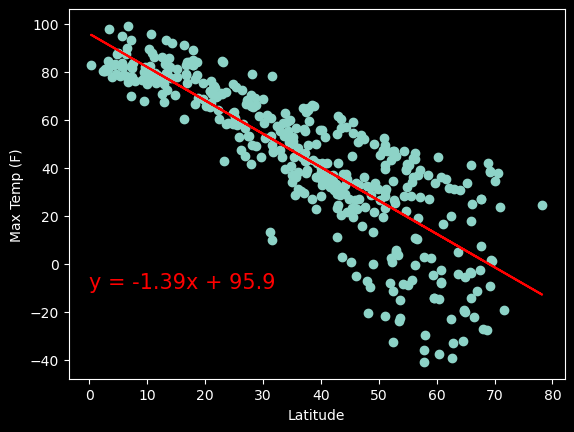

In [20]:
# Linear regression on Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
temperature_northern = northern_hemi_df['Max Temp']
northern_coordinates = (0, -10)
linregress_plot(latitude_northern, temperature_northern, northern_coordinates)
plt.ylabel("Max Temp (F)")
plt.show()

The r-value is: 0.5380911824969195


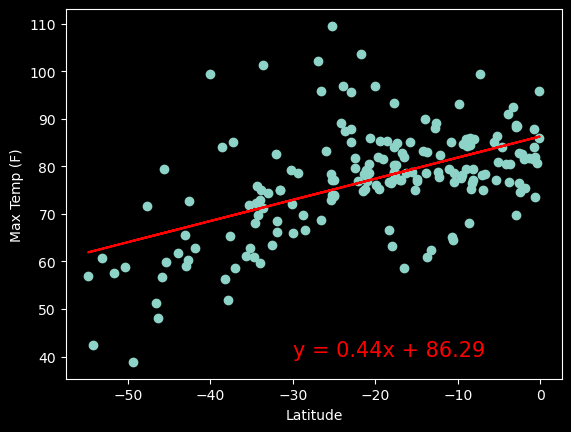

In [21]:
# Linear regression on Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
temperature_southern = southern_hemi_df['Max Temp']
southern_coordinates = (-30, 40)
linregress_plot(latitude_southern, temperature_southern, southern_coordinates)
plt.ylabel("Max Temp (F)")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is a strong correlation between max temperature and latitude. As latitude increases, the max temperature decreases. In the southern hemisphere, there is a moderate correlation between max temperature and latitude. As we move away from the equator and latitude increases, the max temperature decreases. Both hemispheres see a decrease in temperature as we move away from the equator, but the correlation is much stronger in the northern hemisphere. This could be due to the fact that the northern hemisphere is experiencing winter currently, so the cities with greater latitude will be experiencing colder temperatures compared to the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.46220001414820683


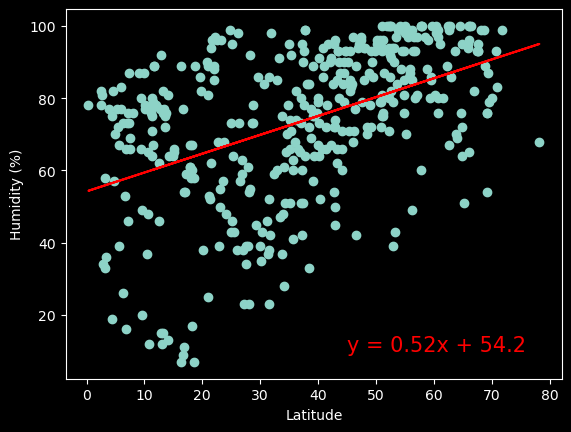

In [22]:
# Northern Hemisphere
humidity_northern = northern_hemi_df['Humidity']
linregress_plot(latitude_northern, humidity_northern, (45, 10))
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.13035380463631918


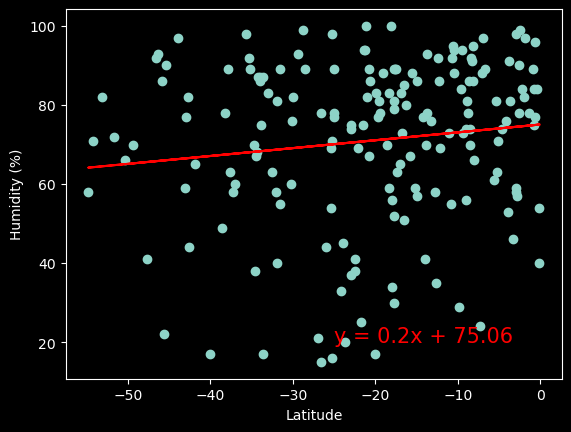

In [23]:
# Southern Hemisphere
humidity_southern = southern_hemi_df['Humidity']
linregress_plot(latitude_southern, humidity_southern, (-25,20))
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a moderate correlation between latitude and humidity. There is a moderate tendency for the humidity to increase as we move away from the equator and latitude increases. The southern hemisphere has a weak correlation between humidity and distance from the equator, so an increase in latitude away from the equator doesn't have much of an influence on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20848699912862703


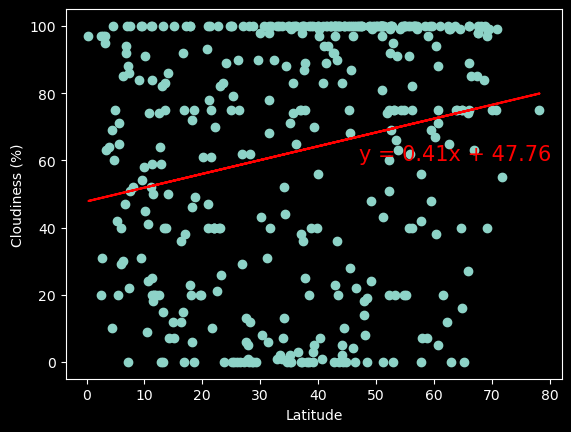

In [24]:
# Northern Hemisphere
cloudiness_northern = northern_hemi_df['Cloudiness']
linregress_plot(latitude_northern, cloudiness_northern, (47, 60))
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.3071138035468801


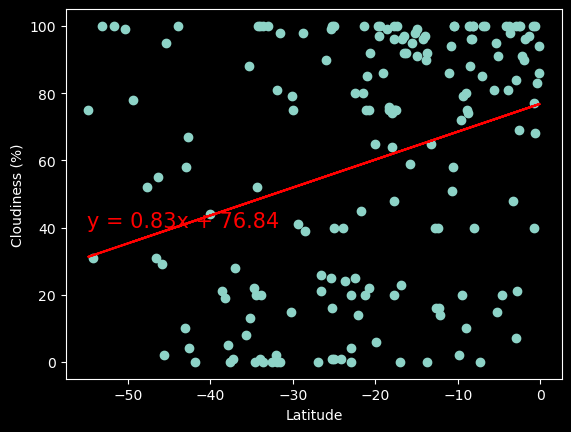

In [25]:
# Southern Hemisphere
cloudiness_southern = southern_hemi_df['Cloudiness']
linregress_plot(latitude_southern, cloudiness_southern, (-55, 40))
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemisphere have low correlations between cloudiness and proximity to the equator. The cloudiness slightly increases as we move away from the equator in the northern hemisphere. The cloudiness slightly decreases as we move away from the equator in the southern hemisphere, and the correlation is slightly stronger than in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07761980084153043


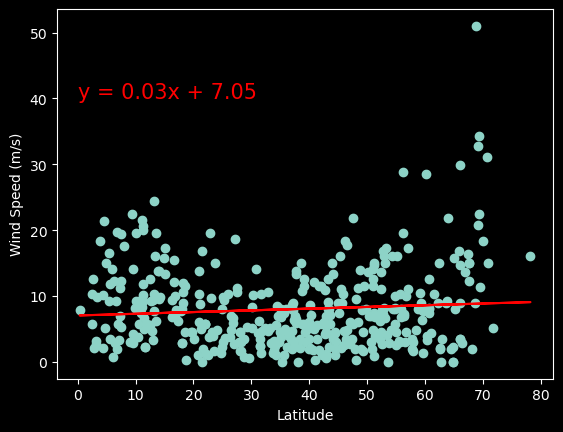

In [26]:
# Northern Hemisphere
wind_speed_n = northern_hemi_df['Wind Speed']
linregress_plot(latitude_northern, wind_speed_n, (0, 40))
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: 0.23093291477977484


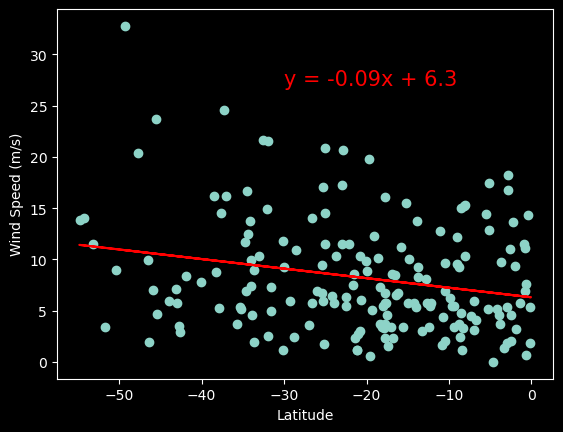

In [28]:
# Southern Hemisphere
wind_speed_s = southern_hemi_df['Wind Speed']
linregress_plot(latitude_southern, wind_speed_s, (-30, 27))
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between wind speed and distance from the equator in the northern hemisphere. There is a low correlation between wind speed and distance from the equator in the southern hemisphere. The wind speed slightly increases as we move away from the equator in the southern hemisphere.